<a href="https://colab.research.google.com/github/Rocco6745667/Assignment3/blob/master/Project_Report_Group_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

The competition dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on the Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition.

# **Data Description**

--Attributes Given--

**id** - a unique identifier for each trip

**vendor_id** - a code indicating the provider associated with the trip record

**pickup_datetime** - date and time when the meter was engaged

**dropoff_datetime** - date and time when the meter was disengaged

**passenger_count** - the number of passengers in the vehicle (driver entered value)

**pickup_longitude**  - the longitude where the meter was engaged

**pickup_latitude** - the latitude where the meter was engaged

**dropoff_longitude** - the longitude where the meter was disengaged

**dropoff_latitude** - the latitude where the meter was disengaged

**store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

**trip_duration** - duration of the trip in seconds

--Our Attributes--

**distancesLongLat** - longitude and latitude where meter was engaged and disengaged

**distancesKm** - trip distances in Km 

**tripDurationMin** - trip duration in minutes

**pickUpTimesSorted** - sorted dates when meter was engaged 

#**Exploratory Data Analysis**

The following section of code is to filter the given attributes, and use them to create the attributes that we have decided are necessary. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd 'drive/MyDrive/Colab Notebooks/'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy.distance
import statsmodels.api as sm
from sklearn.cluster import KMeans

df = pd.read_csv('train.csv', low_memory =False)

FileNotFoundError: ignored

In [ ]:
#extracts passenger row
passengerCount = df.iloc[0:200000,4]

#extract longitude and latitude rows
distancesLongLat = df.iloc[0:200000,5:9]
distancesKm = np.zeros((200000,1))

#gets each pair of coordiantes and find the distance between them in Km and puts them into an array, while also getting rid of the very few outliers
for i, r in distancesLongLat.iterrows():
  coords1 = (r[0],r[1])
  coords2 = (r[2],r[3])
  if (geopy.distance.geodesic(coords1,coords2).km > 150):
    continue
  distancesKm[i] = round(geopy.distance.geodesic(coords1,coords2).km,2)

In [ ]:
#extracts trip durations
tripDurationSec = df.iloc[0:200000,10]
tripDurationMin = np.zeros((200000,1))

#turns the trip durations from seconds to minutes and puts them into an array
for i, r in enumerate(tripDurationSec):
  if (r/60 > 200):
    continue
  tripDurationMin[i] = round(r/60,0)

In [ ]:
#makes an array with the pick up times and sorts it
pickUpTimes = df.iloc[0:200000,2]
pickUpTimes = pickUpTimes.sort_values()

pickUpTimesSorted = np.zeros((200000,1), dtype='object')

#gets rid of time of pick up and just keeps the date
for i, r in enumerate(pickUpTimes):
  pickUpTimesSorted[i] = r[0:10]

The following section of code focuses on exploring the data and the attributes we have created.

In [ ]:
#describes entire dataset
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
#describes basic statistics of passenger count
print("Passenger Count Stats")
passengerCount.describe()

Passenger Count Stats


count    200000.000000
mean          1.664310
std           1.312426
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

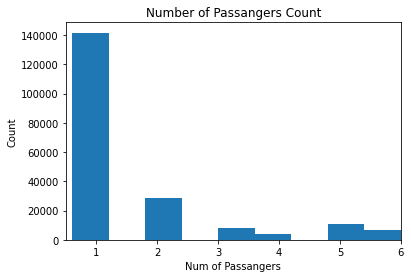

In [ ]:
#creates histogram for passenger count
plt.hist(passengerCount)
plt.title('Number of Passangers Count')
plt.xlabel('Num of Passangers')
plt.ylabel('Count')
plt.xlim([0.5,6])
plt.show()

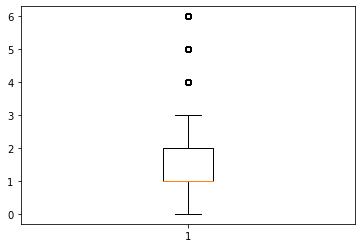

In [ ]:
#creates boxplot for passenger count
plt.boxplot(passengerCount)
plt.show()

In [ ]:
#calculates statistical descriptions for distance travelled
mean = np.mean(distancesKm)
median = np.median(distancesKm)
min = np.amin(distancesKm)
max = np.amax(distancesKm)
range = np.ptp(distancesKm)
variance = np.var(distancesKm)
sd = np.std(distancesKm)
 
print("Distance Travelled Stats")
print("Mean =", mean)
print("Median =", median)
print("Minimum =", min)
print("Maximum =", max)
print("Range =", range)
print("Variance =", variance)
print("Standard Deviation =", sd)
print("Q1 =",np.percentile(distancesKm, 25) )
print("Q3 =",np.percentile(distancesKm, 75) )

Distance Travelled Stats
Mean = 2.8706395500000004
Median = 1.53
Minimum = 0.0
Maximum = 121.37
Range = 121.37
Variance = 17.693772522475797
Standard Deviation = 4.206396619729979
Q1 = 0.85
Q3 = 2.85


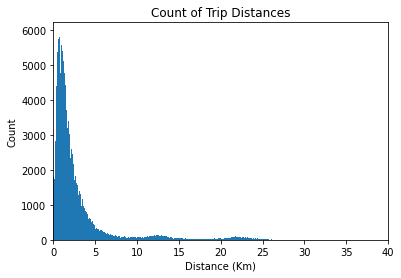

In [ ]:
#creates histogram for distance travelled
plt.hist(distancesKm, bins='auto')
plt.title('Count of Trip Distances')
plt.xlabel('Distance (Km)')
plt.ylabel('Count')
plt.xlim([0,40])
plt.show()

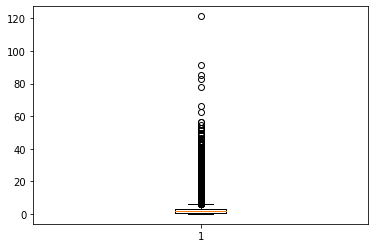

In [ ]:
#creates boxplot for distance travelled
plt.boxplot(distancesKm)
plt.show()

In [ ]:
#calculates statistical description of trip duration
mean = np.mean(tripDurationMin)
median = np.median(tripDurationMin)
min = np.amin(tripDurationMin)
max = np.amax(tripDurationMin)
range = np.ptp(tripDurationMin)
variance = np.var(tripDurationMin)
sd = np.std(tripDurationMin)
 
print("Trip Duration Stats")
print("Mean =", mean)
print("Median =", median)
print("Minimum =", min)
print("Maximum =", max)
print("Range =", range)
print("Variance =", variance)
print("Standard Deviation =", sd)
print("Q1 =",np.percentile(tripDurationMin, 25) )
print("Q3 =",np.percentile(tripDurationMin, 75) )

Trip Duration Stats
Mean = 13.90977
Median = 11.0
Minimum = 0.0
Maximum = 176.0
Range = 176.0
Variance = 120.76019854710002
Standard Deviation = 10.989094528081012
Q1 = 7.0
Q3 = 18.0


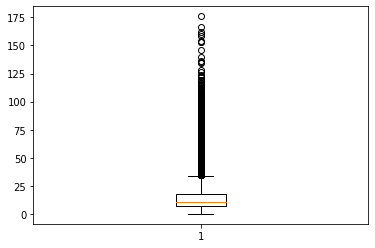

In [ ]:
#creates boxplot for trip duration
plt.boxplot(tripDurationMin)
plt.show()

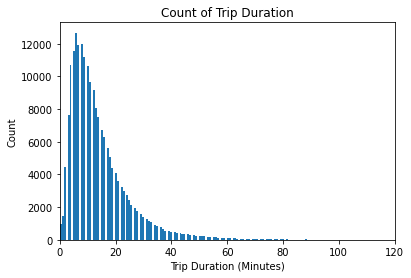

In [ ]:
#creates histogram for trip duration
plt.hist(tripDurationMin, bins=250)
plt.title('Count of Trip Duration')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Count')
plt.xlim([0,120])
plt.show()

## **Findings of EDA**




1.   Passenger count data is positively skewed. The majority of trips took place with 1 passenger. Our outlier detection was done statistically with the following method:

  Calculate IQR: Q3-Q1 = 2-1= 1

  Multiply IQR by 1.5 = 1 * 1.5

  Round up as 1.5 passengers is not a real value ~ 2
  Anything above 2 passengers is an outlier.

  
2.   Distance travelled is positively skewed. Outlier detection was done statistically, with the following method:

  Calculate IQR: Q3-Q1 = 2.85-0.85= 2

  Multiply IQR by 1.5 = 2 * 1.5 = 3

  Any distance travelled over 3km is an outlier.


3.   Trip duration is positively skewed. Outlier detection was done statistically, with with the following method:

  Calculate IQR: Q3-Q1 = 18 - 7 = 11

  Any trip over 11 minutes is considered an outlier.



#**Research Questions**

**1.** The relationship between the number of passengers and the distance travelled/time it took to complete the trip

**2.** The correlation between the number of trips and the time of the trip (the dates on which consumers use the taxi system and if there is a certain number of days which they use it more)

**3.** The correlation between trip distance and the time it took to complete the trip

#**Techniques Used**



1.   Data preprocessing:
We did some data cleaning for the data that was faulty. We found that in some cases, data was incomplete when the duration of the trips was very short (1-2 minutes). This would result in some issues such as displaying the passenger count as 0, or the distance travelled as 0. For these instances of corrupted data, we used listwise deletion to eliminate the affected rows. 

2.   K-Means Clustering:
We used K-Means Clustering to better explain the relationship between trip distance and its duration. In doing so we where able to see that traffic plays a huge part in how long a trip may take as there is a huge variation in trips that are the same distance in length.



#**Analysis**

In [ ]:
#makes empty array for our sample 
datMat = np.zeros((200000,2))

#puts the distances in first coloumn
for i, v in enumerate(distancesKm):
  datMat[i][0] = v

#puts the trip durations in the second colomun
for i, v in enumerate(tripDurationMin):
  datMat[i][1] = v

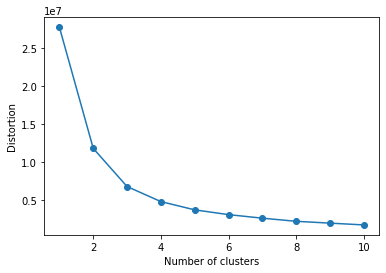

In [ ]:
#initializes the disortionas array
distortions = []

array=[1,2,3,4,5,6,7,8,9,10]

#calculates the disortion for a rand of number of clusters
for i in array:
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(datMat)
    distortions.append(clustering.inertia_)


#plots the distortions
plt.plot(array, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Looking at the Elbow method above we see that the optimal amount of clusters that we should use is around 3 as this is where the inflection point is on the line graph

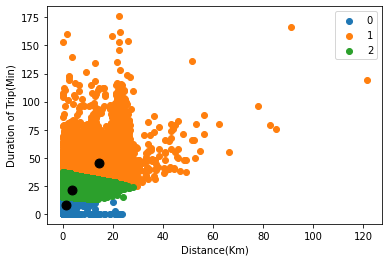

In [ ]:
#initializes the KMeans class object with k clusters equal to 3 that we got from the eblow method above
kmeans = KMeans(n_clusters= 3)

#predicts the cluster index for our sample
label = kmeans.fit_predict(datMat)

#gets each unique lable as well as finds the centroids
uLabels = np.unique(label)
centroids = kmeans.cluster_centers_

#plots the results for each label as well as the centroids
for i in uLabels:
    plt.scatter(datMat[label == i , 0] , datMat[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

plt.legend()
plt.xlabel('Distance(Km)')
plt.ylabel('Duration of Trip(Min)')
plt.show()

Above we can see our three clusters of data when comparing distances travelled in Km to the duration of that trip. Looking at the clusters we see that the first cluster are trips that are less than 20 km tend to be no more than 15 min long, which relates to the fact that shorter trips take a shorter amount of time. The second cluster shows trips that are up to 20 km may also take longer than 15 min (specifically 15 min to 40 min), we think this is also because of traffic within the city region. Finally the third cluster shows that most trips over 30 km take longer than 40 min, which goes with the fact that longer distances relate to a longer trip time but also shows that traffic plays a huge part as well, as we can also see that there are way more trips that are shorter than 40 km but take longer than 40 min

# **Discussion**

In conclusion, upon working on the 2016 NYC Yellow Cab trip data, and answering the above questions numbered 1 to 3:

1a- According to our second last scatter plot of passenger counts and distance of trips; we have observed that the higher number of passengers (we have analyzed a count of passengers from 1-6), the lower km of distance travelled by the cabs. In our graphs:

-  when the counts of passengers is 1, the majority of 
passengers travel 1-58 km to a max distance of 120km(1 passenger instance).

-  when the counts of passengers are 3, the majority of passengers travel a distance from 1-35km to a max distance of 50km(2 passenger instances).

-  When the count of passengers is 6, the majority of passengers travel a distance of 33km to a max distance of 50km (1 passenger instance).

Thus, this makes sense becuase in our case of NYC, most people travel individually for work, being more distances and different destinations of customers compared to higher number of passengers where a group of friends, colleagues or etc travel together which results in minimal distances.


1b- According to our last scatter plot of passenger counts and trip duration in mins; we have observed that the higher number of passengers (we have analyzed a count of passengers from 1-6), the lower mins of trip duration. In our graphs:

-  when the counts of passengers is 1, the majority of passengers trip duration is 170 mins to a max of 348 minutes.

-  when the counts of passengers are 6, the majority of passengers trip duration is 110 minutes to a maximum of 125 minutes.

To summarize, this analysis follows the previous following question(1a) where less number of passengers take various roots resulting in a longer duration, compared to more passengers with lower distances resulting in lower taxi trip durations

2- Our plot on the appendix #1 indicates that there is no significant correlation between the number of trips, and the date of the trip. This is because New York City being one of the busiest cities in the world; has a significant number of passengers on most of the days regardless of how many trips are made. One thing to note is that, there are no dates where there are no trips, and the lowest trip on a week/month of the year is when there were around 140,000 number of trips.


3- According to our Histogram and scatter plot on 'Duration of Trips vs The number of trips', the correlation between trip distance and the time it took to complete the trip in our sample of 12000 number of trips trends to a greater number of trips leaning towards 20 minutes or lower compared to trips that are in the range of 50-80 minutes which are barely visible. We have also achieved a mean trip duration of 14 minutes in our sample of trip numbers

The last part will be focused on the 'Exploratory Data Analysis':

We performed this task on three of our primary variables being 'Passenger Count', 'Distance of Trips', and 'duration of trips'. These variables gave us a five number summary for all:


-  Passenger count: since we had 20,000 passengers in our sample, our mean, standard deviation, 2nd Quartile, median, and third quartle was ranging from 0-2 with a maximum of 6.

-  Distance of trips: this gave us an birds eye view of our variable dispersion. we got our range from 0-121.37 with standard deviation of 4.2.

-  Moreover, the duration of trips had taken samples according to of trip numbers for our plots. Similarly, we had a range from 0-391 with mean of 13.91, and a standard deviation of 11.1.

4- For our technique of K-Means clustering, the Elbow method gave us an idea that we should use k=3 as starting from k =3, the incline decreases and starts to steady up compared to k=1 and k=2. Hence,  the first cluster are trips less than 20 km and less than 15 minutes long, the second cluster talks about trips 20km taking more than 15 minutes due to traffic, the third cluster shows trips above 30 km and more than 40 mins by using the k-means clusters tutorial used with the reference of collabs used in our class lecture methods. The centroids of each clusters are present and can be viewed in the second plot under the analysis.

5- We assumed that because this data is taken in New York, the duration of the trip will depend not only on the distance you want to travel, but also on the time of day. To determine whether or not our assumption was true, we did a graph to figure out how many trips people took at which times of day. We added granularity to the date, and focused on the hour which people were taking cabs. Our assumption was that there would be an increased demand of cabs around the times that people were going to work, and when people were leaving work. Plotting the data, we indeed found an increase in demand of cabs from 7am to 9am, and an increase from 2pm to 4pm. There was a dropoff between those times in the demand of cabs as well, but the dropoff was somewhat less after the 4pm mark as people tend to leave work at different times. Additionally, we found that there was an increase in cab demand from 9pm to 11pm. We figured that this would be because New York is a city where people go out a lot, so after work, there would be an increase in cab demand as well to account for people going to bars, events, restaurants, etc. (See graph 6 in appendix)

6- To confirm this, we also did an additional plot of the duration of trip versus the time of day. We found that the graph looks essentially identical to the initial graph which counts the number of people taking cabs at certain times of day. **Because of this, we are able to say that if a person wants to take a cab in New York, the time it would take for them to complete that trip will depend not only on the distance they want to travel, but the time of day at which they take the cab due to New York being a busy city with exceptional congestion.** (See graph 7 in appendix)

#**Self assessment**

**Omar Mosly**

Part 1:
Gave ideas for 2 questions that were not used in the final report.

Part 2:
Created new report to better organize our information and add clarity to report.

Did exploratory data analysis.



Ideas and some implementation of techniques we can use to analyze our data.
Pitched idea of prescription of time of day vs duration of trip rather than just distance.

**Daniel Gherman**

Part 1: Helped out with the research questions

Part 2: Wrote the code to do the exploratory data analysis to find trends in the data and helped explain what they meaned as well as I wrote the code to do Elbow method as well as the KMeans Clustering and explained the findings. Did coding for figuring out the count of cabs at certain times, as well as the duration of trips vs the time of day.

**Rocco Ali** 

Part 1: Gave ideas about questions that we could 
use for our report 

Part 2: I have helped out making the code, 
sepcfically the plots, explaing what they mean, organizing the data. Helped organize the final report laying in out in accourndance to the guilelines set forth in the instrctions. Polished out ideas sated in the presenttation and helped finalize our machine learning component.

**Huan-Che Hsu**

Part 1: I am reposible to finish the proposal, and provide a research question that we focus on our project.

Part 2: Mostly communication on how the researching part are established and helping out with the presentation.

**Waqas Shaikh**

Part 1: My contribution in the group has been to work on analyzing the questions, and using them into the discussion aspect of our final submission report. 

Part 2: I have analyzed each question with our intial question, our findings, using the EDA, and what we take from each question as a summary of this collab document.
 
Part 3: I have also taken the resposbility of designing and making the presentation slides of our group to have the work load divided qually amongst our groups.

#**Appendix**

The following is anything we found that doesn't flow well with the report, but was important information that we thought was necessary to include.

### Graph 1

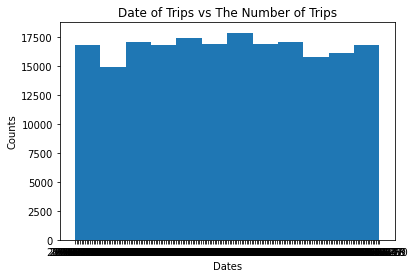

In [ ]:
plt.hist(pickUpTimesSorted, bins=12)
plt.title('Date of Trips vs The Number of Trips')
plt.xlabel('Dates')
plt.ylabel('Counts')
plt.show()

This histogram shows that there is no correlation between the dates that trips where done, meaning there are no specific times during the year where there are more trips then others.

### Graph 2

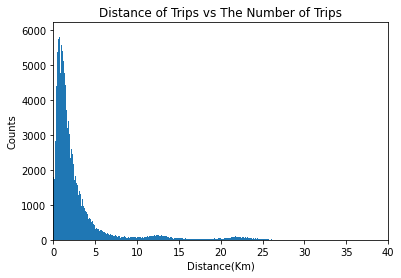

Mean: 3.0


In [ ]:
plt.hist(distancesKm, bins='auto')
plt.title('Distance of Trips vs The Number of Trips')
plt.xlabel('Distance(Km)')
plt.ylabel('Counts')
plt.xlim([0,40])
plt.show()

print ('Mean: {0}'.format(round(distancesKm.mean(),0)))

This histogram shows that there are alot more trips with a distance of less than 5km, this is shown also by the mean which is 3km
The graph is also positively skewed.

### Graph 3

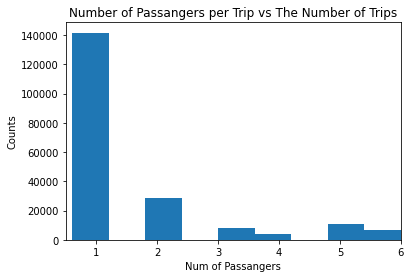

Mean: 1.7


In [ ]:
plt.hist(passengerCount)
plt.title('Number of Passangers per Trip vs The Number of Trips')
plt.xlabel('Num of Passangers')
plt.ylabel('Counts')
plt.xlim([0.5,6])
plt.show()

print ('Mean: {0}'.format(round(passengerCount.mean(),1)))

This histogram shows that there are alot more trips with 1 passangers as supposed to the rest. This is in line with the mean of 2
The graph is also positively skewed.

### Graph 4

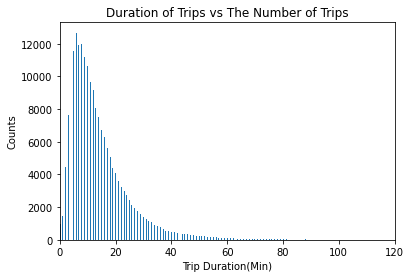

Mean: 14.0


In [ ]:
plt.hist(tripDurationMin, bins=500)
plt.title('Duration of Trips vs The Number of Trips')
plt.xlabel('Trip Duration(Min)')
plt.ylabel('Counts')
plt.xlim([0,120])
plt.show()

print ('Mean: {0}'.format(round(tripDurationMin.mean(),0)))

### Graph 5

This histogram shows that there tends to way more trips that last 20 min or less. This is in line with the mean, which is 14 min.
The graph is also positively skewed.

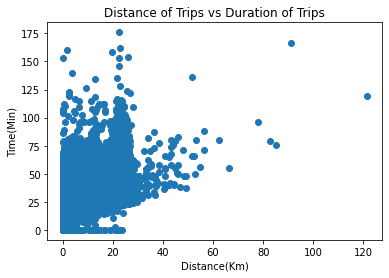

In [ ]:
plt.scatter(distancesKm, tripDurationMin)
plt.title('Distance of Trips vs Duration of Trips')
plt.xlabel('Distance(Km)')
plt.ylabel('Time(Min)')
plt.show()

This scatterplot shows that the majority of trips are between 1km and 50km, with most being between 1km-10km, which correlates to the mean of the distances which is 13 Km. Conversly the time of each trip is mostly below 50 min, which correlates with the mean of trip durations of 14 min
The trip time does increase as the distances increases but conversly, since most of the time a cab will be in the city, short distances tend to be longer as well because of traffic

### Graph 6

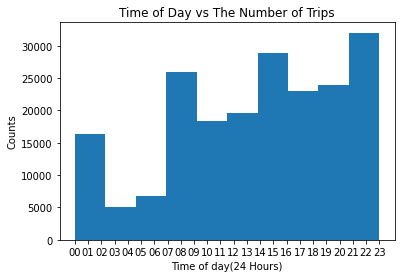

In [ ]:
#takes pickup times and sorts them
pickUpTimes = df.iloc[0:200000,2]
pickUpTimes = pickUpTimes.sort_values()

#makes empty array to put sorted pickup times
pickUpTimesSorted = np.zeros((200000,1), dtype='object')

#appends each sorted pickup times to new array
for i, r in enumerate(pickUpTimes):
  pickUpTimesSorted[i] = r[11:13]

#plots it
plt.hist(pickUpTimesSorted)
plt.xlabel('Time of day(24 Hours)')
plt.ylabel('Counts')
plt.title('Time of Day vs The Number of Trips')
plt.show()

So clearly we can see that there are spikes in the amount of trips in the morning(7am - 9 am) and slight drop off until (2pm - 4pm). This can be because people are going to and from work. It seems to increase after 9pm, maybe indicating that people tend to go out at night, with a significant drop off at 2 am because way less people tend to use the cab during late hours.

### Graph 7

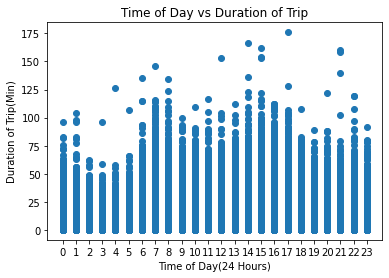

In [ ]:
#gets the pickup times and puts them into an array
timesOfPickup = df.iloc[0:200000,2]

#makes another pickup times array so that we can parse the data
timesOfPickupUnsorted = np.zeros((200000,1), dtype='object')

#parses the time
for i, r in enumerate(timesOfPickup):
  timesOfPickupUnsorted[i] = r[11:13]

#changes pickup time array to float
timesOfPickupUnsorted = timesOfPickupUnsorted.astype('float64')

#plots it
x = np.arange(0,24,1)
plt.scatter(timesOfPickupUnsorted,tripDurationMin)
plt.xlabel('Time of Day(24 Hours)')
plt.ylabel('Duration of Trip(Min)')
plt.xticks(x)
plt.title('Time of Day vs Duration of Trip')
plt.show()

We can see that the duration of the trip affected by the time at which a cab was taken. This duration increase correlates to the previous graph, which saw an increase of cab demand depending on the time of day as well. Because of this, we can say that there is increased congestion of traffic at those times, therefore resulting in longer trip durations at those times.

### Graph 8

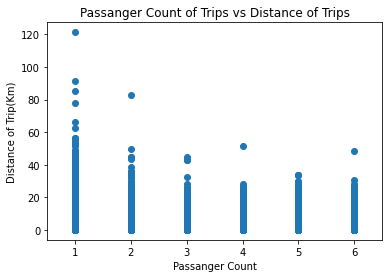

In [ ]:
plt.scatter(passengerCount, distancesKm)

plt.title('Passanger Count of Trips vs Distance of Trips')
plt.xlabel('Passanger Count')
plt.ylabel('Distance of Trip(Km)')
plt.xlim([0.5,6.5])
plt.show()

This scatter plot shows that the trip distances tend to be smaller with a larger group of people

###Graph 9

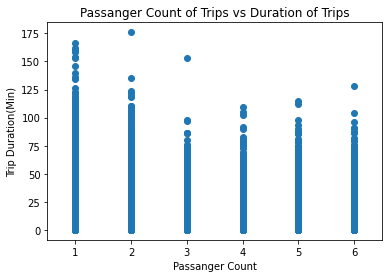

In [ ]:
plt.scatter(passengerCount, tripDurationMin)
plt.title('Passanger Count of Trips vs Duration of Trips')
plt.xlabel('Passanger Count')
plt.ylabel('Trip Duration(Min)')
plt.xlim([0.5,6.5])
plt.show()

This scatter plot shows that there are more smaller groups of people doing longer trips

This relates to the Passanger Count of Trips vs Distance of Trips, with this we can conclude that smaller group of people do longer trips which correlates with the fact that longer trips take longer in general